# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [2]:
pricing = pd.read_csv(r"D:\LPU Academic Files\SEM 6 FILES\ML (CSM 354)\Car Price Prediction SLR Project\CarPrice_Assignment.csv")
pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
pricing.shape

(205, 26)

In [4]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
pricing=pricing.drop("car_ID",axis = 1)
pricing.describe()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


sns.pairplot(pricing)
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(5,2,1)
sns.boxplot(x="fueltype",y="price", data = pricing)
plt.subplot(5,2,2)
sns.boxplot(x="aspiration",y="price", data = pricing)
plt.subplot(5,2,3)
sns.boxplot(x="doornumber",y="price", data = pricing)
plt.subplot(5,2,4)
sns.boxplot(x="carbody",y="price", data = pricing)
plt.subplot(5,2,5)
sns.boxplot(x="drivewheel",y="price", data = pricing)
plt.subplot(5,2,6)
sns.boxplot(x="enginelocation",y="price", data = pricing)
plt.subplot(5,2,7)
sns.boxplot(x="enginetype",y="price", data = pricing)
plt.subplot(5,2,8)
sns.boxplot(x="cylindernumber",y="price", data = pricing)
plt.subplot(5,2,9)
sns.boxplot(x="fuelsystem",y="price", data = pricing)
#plt.subplot(5,2,10)
#sns.boxplot(x="CarName",y="price", data = pricing)
plt.show()

In [6]:
pricing["CarName"] = pricing["CarName"].str.split().str[0].str.lower()

In [7]:
print(pricing["CarName"].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


# Creating Duplicate Variables
fueltype ,aspiration, doornumber, enginelocation all of them to binary
carbody, drivewheel, enginetype, fuelsystem, cylindernumber to dummy variable

In [8]:
binary_varlist = ["cylindernumber"]
binary_var_mapping = {
    "cylindernumber":{"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12}
}

pricing[binary_varlist] = pricing[binary_varlist].apply(lambda x: x.map(binary_var_mapping.get(x.name, {})))
pricing[binary_varlist]

,cylindernumber
0,4
1,4
2,6
3,4
4,5
...,...
200,4
201,4
202,6
203,6


In [9]:
pricing.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
status = pd.get_dummies(pricing["drivewheel"],drop_first = True)
pricing = pd.concat([pricing,status],axis = 1)

In [11]:
status = pd.get_dummies(pricing["fueltype"],drop_first = True)
pricing = pd.concat([pricing,status],axis = 1)

In [12]:
status = pd.get_dummies(pricing["aspiration"],drop_first = True)
pricing = pd.concat([pricing,status],axis = 1)

In [13]:
status = pd.get_dummies(pricing["doornumber"],drop_first = True)
pricing = pd.concat([pricing,status],axis = 1)

In [14]:
status = pd.get_dummies(pricing["enginelocation"],drop_first = True)
pricing = pd.concat([pricing,status],axis = 1)

In [15]:
status1 = pd.get_dummies(pricing["carbody"],drop_first = True)
#status1 = pd.get_dummies(pricing["CarName"],drop_first = True)
pricing = pd.concat([pricing,status1],axis = 1)

In [16]:
pricing = pricing.drop(["carbody","enginelocation","doornumber","aspiration","fueltype","drivewheel"],axis=1)

In [17]:
pricing.head()
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginetype        205 non-null    object 
 8   cylindernumber    205 non-null    int64  
 9   enginesize        205 non-null    int64  
 10  fuelsystem        205 non-null    object 
 11  boreratio         205 non-null    float64
 12  stroke            205 non-null    float64
 13  compressionratio  205 non-null    float64
 14  horsepower        205 non-null    int64  
 15  peakrpm           205 non-null    int64  
 16  citympg           205 non-null    int64  
 1

# Splitting into training and testing data

In [18]:
pricing_train,pricing_test = train_test_split(pricing, train_size = 0.7, random_state = 100)
print(pricing_train.shape)
print(pricing_test.shape)

(143, 29)
(62, 29)


# Scaling of the data

In [19]:
scaler = MinMaxScaler()
num_variables = ["symboling", "wheelbase","carlength", "carwidth","carheight","curbweight",
                 "cylindernumber","enginesize","boreratio","stroke","compressionratio",
                 "horsepower","peakrpm","citympg","highwaympg","price"]
pricing_train[num_variables] = scaler.fit_transform(pricing_train[num_variables])

# Training the model

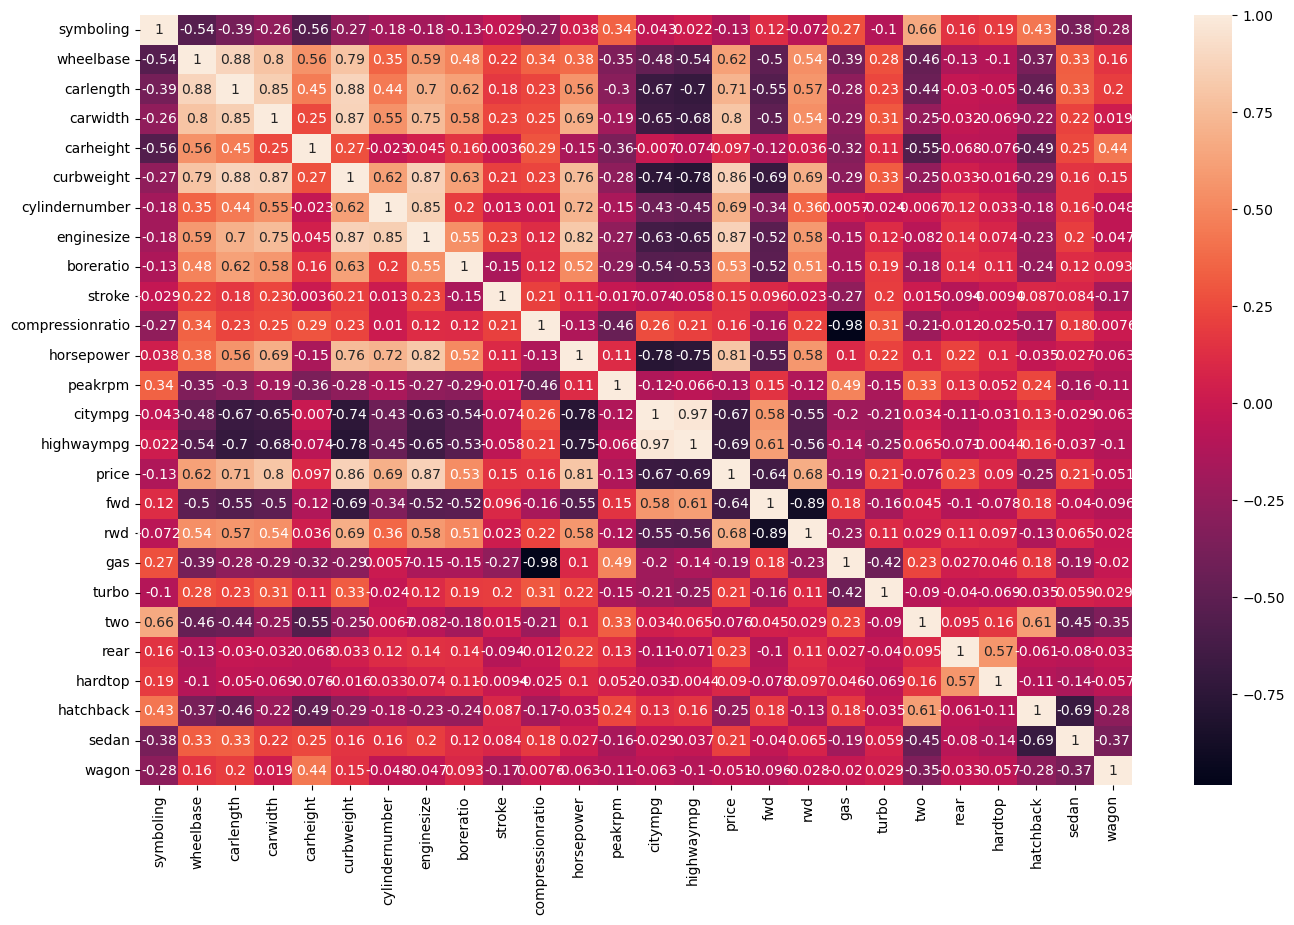

In [20]:
plt.figure(figsize = (16,10))
sns.heatmap(pricing_train.corr(), annot = True)
plt.show()

In [21]:
y_train = pricing_train.pop("price")
x_train = pricing_train

In [22]:
x_train_sm = sm.add_constant(x_train["enginesize"])

lr = sm.OLS(y_train, x_train_sm)
lr_model=lr.fit()
lr_model.params

const        -0.072888
enginesize    1.210676
dtype: float64

In [23]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           1.09e-44
Time:                        16:43:52   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.000      -0.106      -0.040
enginesize     1.2107      0.058     20.748      0.000       1.095       1.326
==============================================================================
Omnibus:                       23.257   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.410
Skew:                           0.885   Prob(JB):                     9.17e-08
Kurtosis:                       4.520   Cond. No.                         6.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:


x_train_sm = sm.add_constant(x_train[["enginesize","curbweight","carwidth","horsepower",
                                      "carlength","boreratio","rwd","rear","hatchback"]])#,"cylindernumber","highwaympg",,"fwd","sedan""citympg","wheelbase"

lr = sm.OLS(y_train, x_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     97.99
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           2.91e-54
Time:                        16:43:52   Log-Likelihood:                 162.25
No. Observations:                 143   AIC:                            -304.5
Df Residuals:                     133   BIC:                            -274.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0878      0.028     -3.174      0.002      -0.143      -0.033
enginesize     0.4378      0.103      4.235      0.000       0.233       0.642
curbweight     0.2196      0.118      1.866      0.064      -0.013       0.452
carwidth       0.4016      0.086      4.677      0.000       0.232       0.571
horsepower     0.1917      0.081      2.353      0.020       0.031       0.353
carlength     -0.1732      0.092     -1.889      0.061      -0.354       0.008
boreratio     -0.0847      0.044     -1.919      0.057      -0.172       0.003
rwd            0.0826      0.020      4.044      0.000       0.042       0.123
rear           0.3414      0.088      3.863      0.000       0.167       0.516
hatchback     -0.0442      0.018     -2.483      0.014      -0.079      -0.009
==============================================================================
Omnibus:                       57.367   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.198
Skew:                           1.279   Prob(JB):                     6.58e-71
Kurtosis:                       9.906   Cond. No.                         33.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
x_train = x_train.drop(["CarName","enginetype","fuelsystem"],axis=1)

In [26]:
x_train.info()
x_train.shape[1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         143 non-null    float64
 1   wheelbase         143 non-null    float64
 2   carlength         143 non-null    float64
 3   carwidth          143 non-null    float64
 4   carheight         143 non-null    float64
 5   curbweight        143 non-null    float64
 6   cylindernumber    143 non-null    float64
 7   enginesize        143 non-null    float64
 8   boreratio         143 non-null    float64
 9   stroke            143 non-null    float64
 10  compressionratio  143 non-null    float64
 11  horsepower        143 non-null    float64
 12  peakrpm           143 non-null    float64
 13  citympg           143 non-null    float64
 14  highwaympg        143 non-null    float64
 15  fwd               143 non-null    uint8  
 16  rwd               143 non-null    uint8  
 1

25

In [27]:
vif = pd.DataFrame()
columns = ["enginesize","curbweight","carwidth","horsepower","carlength","boreratio","rwd","rear","hatchback"]
temp = x_train[columns]
vif["Features"] = temp.columns
vif["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,curbweight,61.42
4,carlength,45.45
2,carwidth,39.61
0,enginesize,19.13
3,horsepower,11.40
5,boreratio,11.26
6,rwd,3.05
8,hatchback,1.60
7,rear,1.18


# Residual Analysis

In [28]:
y_train_pred = lr_model.predict(x_train_sm)
y_train_pred

122    0.072992
125    0.389781
166    0.140474
1      0.245450
199    0.375408
         ...   
87     0.174954
103    0.361934
67     0.562828
24     0.024664
8      0.433330
Length: 143, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

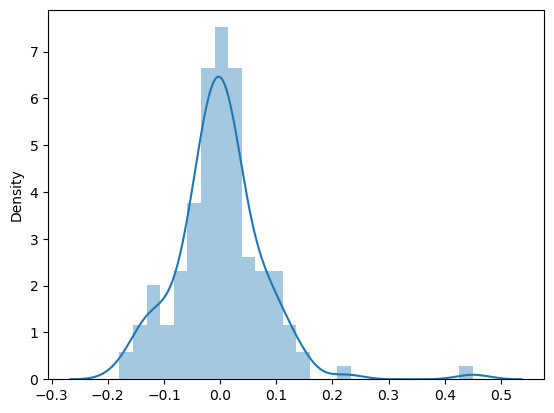

In [29]:
res =y_train - y_train_pred
sns.distplot(res)

# Predictions and Evaluations

In [30]:
num_variables = ["symboling", "wheelbase","carlength", "carwidth","carheight","curbweight",
                 "cylindernumber","enginesize","boreratio","stroke","compressionratio",
                 "horsepower","peakrpm","citympg","highwaympg","price"]
pricing_test[num_variables] = scaler.transform(pricing_test[num_variables])
pricing_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,fwd,rwd,gas,turbo,two,rear,hardtop,hatchback,sedan,wagon
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,0.544314,...,0.564516,0.419355,0.887097,0.177419,0.435484,0.032258,0.080645,0.338710,0.451613,0.096774
std,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,0.160738,...,0.499868,0.497482,0.319058,0.385142,0.499868,0.178127,0.274512,0.477134,0.501716,0.298064
min,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,-0.060606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,0.484848,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,0.585859,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,0.641414,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,0.932075,0.888889,0.863636,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
y_test = pricing_test.pop("price")
x_test = pricing_test

In [33]:
columns = ["enginesize","curbweight","carwidth","horsepower","carlength","boreratio","rwd","rear","hatchback"]
x_test_sm = x_test[columns]
x_test_sm = sm.add_constant(x_test_sm)
x_test_sm.head()

,const,enginesize,curbweight,carwidth,horsepower,carlength,boreratio,rwd,rear,hatchback
160,1.0,0.139623,0.235066,0.341667,0.091667,0.409756,0.404762,0,0,0
186,1.0,0.181132,0.305275,0.433333,0.154167,0.497561,0.404762,0,0,0
59,1.0,0.230189,0.347944,0.516667,0.150000,0.596748,0.563492,0,0,1
165,1.0,0.139623,0.301396,0.308333,0.266667,0.448780,0.444444,1,0,0
140,1.0,0.177358,0.291699,0.291667,0.104167,0.263415,0.746032,0,0,1


In [34]:
x_train_sm

,const,enginesize,curbweight,carwidth,horsepower,carlength,boreratio,rwd,rear,hatchback
122,1.0,0.139623,0.272692,0.291667,0.083333,0.426016,0.230159,0,0,0
125,1.0,0.339623,0.500388,0.666667,0.395833,0.452033,1.000000,1,0,1
166,1.0,0.139623,0.314973,0.308333,0.266667,0.448780,0.444444,1,0,1
1,1.0,0.260377,0.411171,0.316667,0.262500,0.450407,0.626984,1,0,0
199,1.0,0.260377,0.647401,0.575000,0.475000,0.775610,0.746032,1,0,0
...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.184906,0.354926,0.425000,0.283333,0.508943,0.388889,0,0,0
103,1.0,0.452830,0.609775,0.516667,0.433333,0.707317,0.595238,0,0,0
67,1.0,0.460377,0.786268,0.833333,0.312500,0.809756,0.714286,1,0,0
24,1.0,0.109434,0.185803,0.291667,0.083333,0.263415,0.230159,0,0,1


In [35]:
x_test_sm

,const,enginesize,curbweight,carwidth,horsepower,carlength,boreratio,rwd,rear,hatchback
160,1.0,0.139623,0.235066,0.341667,0.091667,0.409756,0.404762,0,0,0
186,1.0,0.181132,0.305275,0.433333,0.154167,0.497561,0.404762,0,0,0
59,1.0,0.230189,0.347944,0.516667,0.150000,0.596748,0.563492,0,0,1
165,1.0,0.139623,0.301396,0.308333,0.266667,0.448780,0.444444,1,0,0
140,1.0,0.177358,0.291699,0.291667,0.104167,0.263415,0.746032,0,0,1
...,...,...,...,...,...,...,...,...,...,...
28,1.0,0.230189,0.406129,0.358333,0.166667,0.544715,0.523810,0,0,0
29,1.0,0.358491,0.513189,0.500000,0.404167,0.521951,0.730159,0,0,1
182,1.0,0.135849,0.299845,0.433333,0.016667,0.497561,0.261905,0,0,0
40,1.0,0.184906,0.342901,0.183333,0.158333,0.557724,0.373016,0,0,0


In [36]:
y_test_pred = lr_model.predict(x_test_sm)

In [37]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8651170032704973